In [1]:
from IPython.display import HTML
import pprint
import numpy as np
import matplotlib.pyplot as plt
import Python_modules.mmcomplexity as mmx

In [2]:
TITLE_FS = 22
AXES_FS = 22
LW = 3

In [3]:
HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">TOGGLE CODE ON/OFF</a>
    '''
)

# Basic examples of `mmcomplexity` module

We generate a block of 10 trials with hazard rate 0.3:

In [4]:
num_trials = 10
hazard_rate = 0.3
stimulus = mmx.StimulusBlock(num_trials, hazard_rate)
print(stimulus)

object of type <class 'Python_modules.mmcomplexity.StimulusBlock'> 
 sources: ['left', 'right', 'left', 'left', 'left', 'right', 'left', 'left', 'left', 'left'] 
 sounds: ['left', 'left', 'right', 'right', 'right', 'right', 'left', 'left', 'right', 'right'] 



Next, we create an ideal observer and run the estimation task on it:

In [5]:
observer = mmx.BinaryDecisionMaker(stimulus)

In [6]:
observer.observe()
print(f"observations: {observer.observations}")

observations: ['left', 'left', 'right', 'right', 'right', 'right', 'left', 'left', 'right', 'right']


In [7]:
decisions = list(observer.process())
pprint.pprint(f"decisions: {decisions}")

("decisions: [(-1.3862943611198908, 'left'), (-1.8758425864385966, 'left'), "
 "(0.7810590528828254, 'right'), (1.685970431742306, 'right'), "
 "(1.9507263643466624, 'right'), (2.0062582215181877, 'right'), "
 "(-0.7558904828598845, 'left'), (-1.677063169724094, 'left'), "
 "(0.8239011511489138, 'right'), (1.7009675725582039, 'right')]")


Now, we generate a few blocks and display the stimulus info as a data frame (first few lines)

In [8]:
tot_trials, h_values, meta_k, meta_prior_h = 5000, [.3], 0, [1]
sim = mmx.Audio2AFCSimulation(tot_trials, h_values, meta_k, meta_prior_h)

In [9]:
pprint.pprint(sim.data.head())

  source  source_switch  sound  sound_switch  hazard  hazard_switch
0  right          False  right         False     0.3          False
1  right          False  right         False     0.3          False
2  right          False  right         False     0.3          False
3  right          False   left          True     0.3          False
4   left           True   left         False     0.3          False


Now, we will display the cumulative frequencies of sound switches and source switches.

In [10]:
sound_switch_cumcount = np.cumsum(sim.data.loc[1:,"sound_switch"]) 
source_switch_cumcount = np.cumsum(sim.data.loc[1:,"source_switch"])
cum_trial = np.arange(1, source_switch_cumcount.size + 1)

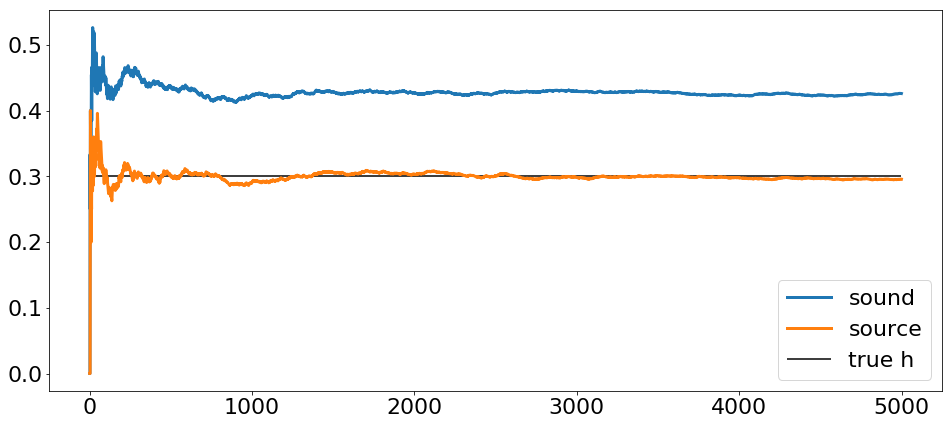

In [11]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 7) # (w, h) # figure size 
plt.rcParams.update({'font.size': AXES_FS}) # font size on axes
# plt.subplots_adjust(wspace=0.5) # horizontal space between panels

plt.plot(cum_trial, sound_switch_cumcount / cum_trial, linewidth=LW)
plt.plot(cum_trial, source_switch_cumcount / cum_trial, linewidth=LW)
plt.hlines(h_values, xmin=cum_trial[0], xmax=cum_trial[-1])
plt.legend(['sound', 'source', 'true h'])

Clearly the effective h differs from the true h. We will run simulations to plot effective h as a function of true h, where effective h is defined as the cumulative frequency of sound switches after 5,000 trials.

In [12]:
true_h = np.linspace(0.05,0.95, 10)
print('true h values used:', true_h)

true h values used: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [13]:
effective_h = []
for h in true_h:
    # launch simulation
    tot_trials, h_values, meta_k, meta_prior_h = 5000, [h], 0, [1]
    sim = mmx.Audio2AFCSimulation(tot_trials, h_values, meta_k, meta_prior_h)
    
    # get effective h
    sound_switch_cumcount = np.array(np.cumsum(sim.data.loc[1:,"sound_switch"]))
    effective_h.append(sound_switch_cumcount[-1] / (source_switch_cumcount.size + 1))

Text(0, 0.5, 'hazard estimate')

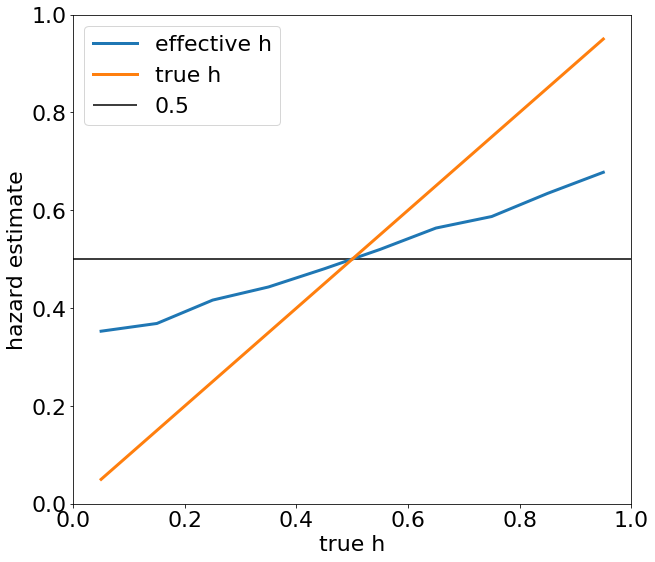

In [14]:
plt.rcParams["figure.figsize"] = (10, 9) # (w, h) # figure size 
plt.plot(true_h, effective_h, linewidth=LW)
plt.plot(true_h, true_h, linewidth=LW)
plt.hlines(0.5, xmin=0, xmax=1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(['effective h', 'true h', '0.5'])
plt.xlabel('true h')
plt.ylabel('hazard estimate')